<a href="https://colab.research.google.com/github/Codes-of-Hermit/Finance_codes/blob/main/Stock_vs_Industry_Standard_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the stock ticker: MSFT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

No ETF found for industry: Software - Infrastructure. Defaulting to SPY (S&P 500 ETF).
MSFT - Annual Return: 31.49%, Annual Volatility: 27.92%
SPY - Annual Return: 15.24%, Annual Volatility: 18.61%


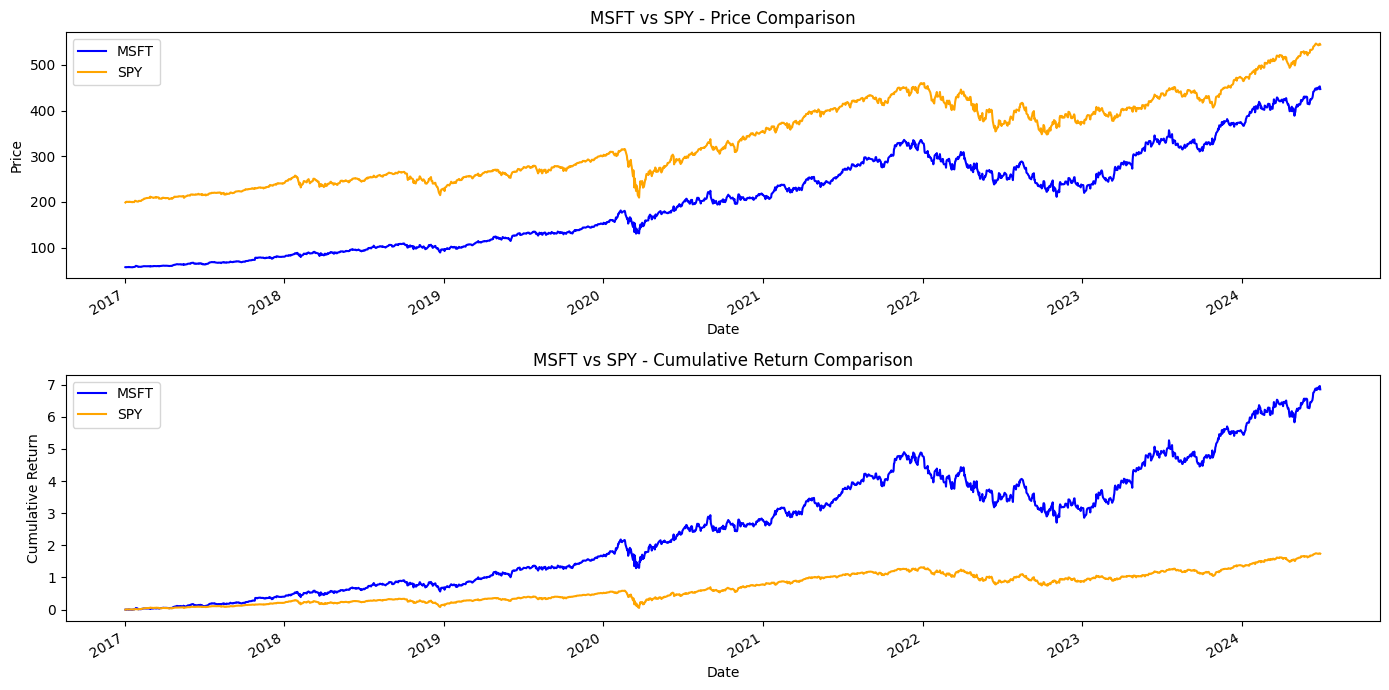

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def fetch_data(ticker, start_date, end_date):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
        if data.empty:
            raise ValueError(f"No data retrieved for ticker: {ticker}")
        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

def get_industry_etf(ticker):
    stock = yf.Ticker(ticker)
    industry = stock.info.get('industry', 'Unknown')

    industry_etfs = {
        'Technology': 'XLK',  # Technology Select Sector SPDR Fund
        'Healthcare': 'XLV',  # Health Care Select Sector SPDR Fund
        'Financial Services': 'XLF',  # Financial Select Sector SPDR Fund
        'Consumer Cyclical': 'XLY',  # Consumer Discretionary Select Sector SPDR Fund
        'Consumer Defensive': 'XLP',  # Consumer Staples Select Sector SPDR Fund
        'Utilities': 'XLU',  # Utilities Select Sector SPDR Fund
        'Energy': 'XLE',  # Energy Select Sector SPDR Fund
        'Industrial': 'XLI',  # Industrial Select Sector SPDR Fund
        'Materials': 'XLB',  # Materials Select Sector SPDR Fund
        'Real Estate': 'XLRE',  # Real Estate Select Sector SPDR Fund
        'Communication Services': 'XLC',  # Communication Services Select Sector SPDR Fund
        'Basic Materials': 'XLB',  # Materials Select Sector SPDR Fund
        'Financial': 'XLF',  # Financial Select Sector SPDR Fund
        'Industrial Goods': 'XLI',  # Industrial Select Sector SPDR Fund
        'Services': 'XLY',  # Consumer Discretionary Select Sector SPDR Fund
        'Conglomerates': 'XLI'  # Industrial Select Sector SPDR Fund
    }

    etf_ticker = industry_etfs.get(industry, None)
    if etf_ticker is None:
        print(f"No ETF found for industry: {industry}. Defaulting to SPY (S&P 500 ETF).")
        etf_ticker = 'SPY'  # S&P 500 ETF as a fallback option
    return etf_ticker

def calculate_annual_return_and_volatility(data):
    daily_returns = data.pct_change().dropna()
    annual_return = daily_returns.mean() * 252
    annual_volatility = daily_returns.std() * np.sqrt(252)
    return annual_return, annual_volatility

def plot_comparison(selected_stock_data, industry_standard_data, selected_stock, industry_standard):
    plt.figure(figsize=(14, 7))

    # Plot adjusted close prices
    plt.subplot(2, 1, 1)
    selected_stock_data.plot(label=selected_stock, color='blue')
    industry_standard_data.plot(label=industry_standard, color='orange')
    plt.title(f'{selected_stock} vs {industry_standard} - Price Comparison')
    plt.ylabel('Price')
    plt.legend()

    # Calculate cumulative returns
    selected_stock_cumulative = (selected_stock_data / selected_stock_data.iloc[0]) - 1
    industry_standard_cumulative = (industry_standard_data / industry_standard_data.iloc[0]) - 1

    # Plot cumulative returns
    plt.subplot(2, 1, 2)
    selected_stock_cumulative.plot(label=selected_stock, color='blue')
    industry_standard_cumulative.plot(label=industry_standard, color='orange')
    plt.title(f'{selected_stock} vs {industry_standard} - Cumulative Return Comparison')
    plt.ylabel('Cumulative Return')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # User input for the selected stock ticker
    selected_stock = input("Enter the stock ticker: ").upper()

    # Fetch data with the current date as the end date
    start_date = '2017-01-01'
    end_date = datetime.today().strftime('%Y-%m-%d')

    selected_stock_data = fetch_data(selected_stock, start_date, end_date)
    industry_standard_ticker = get_industry_etf(selected_stock)
    industry_standard_data = fetch_data(industry_standard_ticker, start_date, end_date)

    if selected_stock_data is not None and industry_standard_data is not None:
        # Calculate annual return and volatility
        selected_stock_return, selected_stock_volatility = calculate_annual_return_and_volatility(selected_stock_data)
        industry_standard_return, industry_standard_volatility = calculate_annual_return_and_volatility(industry_standard_data)

        # Display the calculated metrics
        print(f"{selected_stock} - Annual Return: {selected_stock_return:.2%}, Annual Volatility: {selected_stock_volatility:.2%}")
        print(f"{industry_standard_ticker} - Annual Return: {industry_standard_return:.2%}, Annual Volatility: {industry_standard_volatility:.2%}")

        # Plot the comparison
        plot_comparison(selected_stock_data, industry_standard_data, selected_stock, industry_standard_ticker)
    else:
        print("Error fetching data for selected stock or industry standard.")
